In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.getcwd()

'C:\\Users\\CCM'

In [4]:
newdf=df.iloc[:,2:]

In [5]:
newdf

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# TRAIN TEST SPLIT


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(newdf.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

# 1.STANDARD SCALAR


In [7]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [8]:
x_train_scaled= pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_test_scaled= pd.DataFrame(x_test_scaled, columns=X_test.columns)

In [9]:
x_train_scaled.shape

(280, 2)

# WHY SCALING IS IMPORTANT?

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr= LogisticRegression()
lr_scaled=LogisticRegression()

In [12]:
lr.fit(X_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [13]:
y_pred = lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [14]:
from sklearn.metrics import accuracy_score


In [15]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))


Actual 0.6583333333333333
Scaled 0.8666666666666667


# 2. NORMALIZATION

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler2 =  MinMaxScaler()
scaler2.fit(X_train)



x_train_scaled= scaler2.transform(X_train)
x_test_scaled=scaler2.transform(X_test)

In [17]:
x_train_scaled= pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_test_scaled= pd.DataFrame(x_test_scaled, columns=X_test.columns)

In [18]:
x_train_scaled

,Age,EstimatedSalary
0,0.190476,0.000000
1,1.000000,0.644444
2,0.476190,0.718519
3,0.523810,0.681481
4,0.571429,0.281481
...,...,...
275,0.714286,0.111111
276,0.261905,0.207407
277,0.428571,0.274074
278,0.214286,0.288889


Standard Scaler: Mostly used (Useful in classification)(standardization)

Min Max scalar: Should not be used if data has outliers. Values between 0 to 1(Normalization) in CNN mostly.

Robust scalar : Should be used if data has too many outliers. 

MaxAb Scalar : too many 0's.




# 3. ENCODING CATEGORICAL DATA

In [19]:
# Nominal- One Hot ENCODING if we have n categories we ue n-1 to avoid dummy variable trap or multicollinearity
# Ordinal - Ordinal ENCODING
# Output - Label Encoder

In [20]:
df2=pd.read_csv('cars.csv')

pd.set_option('display.max_columns', None)

In [21]:
df2.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [22]:
df2.iloc[:,0:].nunique()

manufacturer_name      55
model_name           1118
transmission            2
color                  12
odometer_value       6063
year_produced          64
engine_fuel             6
engine_has_gas          2
engine_type             3
engine_capacity        61
body_type              12
has_warranty            2
state                   3
drivetrain              3
price_usd            2677
is_exchangeable         2
location_region         6
number_of_photos       61
up_counter            384
feature_0               2
feature_1               2
feature_2               2
feature_3               2
feature_4               2
feature_5               2
feature_6               2
feature_7               2
feature_8               2
feature_9               2
duration_listed       786
dtype: int64

In [23]:


df2.drop('number_of_photos', axis=1, inplace=True)
df2.drop('is_exchangeable', axis=1, inplace=True)
df2.drop('location_region', axis=1, inplace=True)
df2.drop('up_counter', axis=1, inplace=True)
df2.drop('duration_listed', axis=1, inplace=True)




In [24]:


df2.head(5)


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,True,True,True,False,True,False,True,True,True
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,False,True,False,False,True,True,False,False,False,True
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,False,True,False,False,False,False,False,False,True,True
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,False,True,False,True,True,False,False,False,False,True


In [25]:
df2



,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,True,True,True,False,True,False,True,True,True
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,False,True,False,False,True,True,False,False,False,True
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,False,True,False,False,False,False,False,False,True,True
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,False,True,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,False,True,False,False,True,True,False,False,True,True
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,False,True,False,False,True,True,False,False,True,True
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,True,False,False,True,True,False,False,True,True
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,False,True,False,False,False,False,False,False,False,True


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df2.iloc[:,0:8],df2.iloc[:,-1],test_size=0.3,random_state=0)

In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop ='first',sparse = False,dtype = np.int32)

In [28]:
x_train_new = ohe.fit_transform(X_train.iloc[:,1:8])

In [29]:
x_train_new.shape

(26971, 5681)

In [30]:
count=df2['manufacturer_name'].value_counts()

In [31]:
df2['manufacturer_name'].nunique()
threshold = 500

In [32]:
 replace = count[count<threshold].index

In [33]:
pd.get_dummies(df2['manufacturer_name'].replace(replace,'uncommon'))

,Audi,BMW,Citroen,Fiat,Ford,Honda,Hyundai,Kia,Mazda,Mercedes-Benz,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Toyota,Volkswagen,Volvo,uncommon
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
38527,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
38528,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
38529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# COLUMN TRANFORMER

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [35]:
df2.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,True,True,True,False,True,False,True,True,True
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,False,True,False,False,True,True,False,False,False,True
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,False,True,False,False,False,False,False,False,True,True
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,False,True,False,True,True,False,False,False,False,True


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df2.iloc[:,0:8],df2.iloc[:,-1],test_size=0.3,random_state=0)

In [37]:
;
X_train

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas
17873,Volkswagen,Passat,mechanical,green,350000,1993,gasoline,False
33764,Honda,Civic,mechanical,red,380000,1989,gas,True
12434,Renault,Scenic,mechanical,silver,225000,2009,diesel,False
30104,BMW,320,mechanical,other,398300,1991,gasoline,False
11434,Ford,Mondeo,mechanical,red,230000,1993,gasoline,False
...,...,...,...,...,...,...,...,...
20757,Audi,A6,automatic,black,255000,2010,diesel,False
32103,Skoda,Kodiaq,automatic,blue,0,2019,gasoline,False
30403,Mazda,323,mechanical,blue,307000,1998,gasoline,False
21243,Audi,80,mechanical,red,470000,1988,gas,True


In [38]:
from sklearn.compose import ColumnTransformer

In [39]:
transformer = ColumnTransformer(transformers=[
                                               ('tnf2',OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore'),['transmission','color','engine_type','body_type'])],
                                               remainder='passthrough')

# MATHEMATICAL TRANFORMATION

Function Tranform :- (There hould not be any miing values in the data)

    Log Tranform - Only on poitive data since we cannot calculate log for negative values. Only on right skewed data. 

    Reciprocal :- 1/x
  
    Square Tranform :- Only on left skewed data.
 
 
 
Power Tranform :- Use this feature transformation technique when building a linear model, use it when dealing with                               heteroskedasticity.Log, SQ.root we have these transform However, to use them, we need to first study 
                  the original distribution, and then make a choice. The Power Transformer actually automates this decision                       by making introducing a parameter called lambda.
     
     Box-cox :- We can tranform any distribution into normal distribution. Lambda varies from the range of -5 to 5.
                Applicable to only number greater than 0. Lambda gets calculated using maximum iklihood.Value of x becomes x
                to the power of lambda.
                
                
     yeo-johnon :- Can be applied to negative numbers a well.

In [40]:
newdf.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


C:\Users\CCM\anaconda3\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

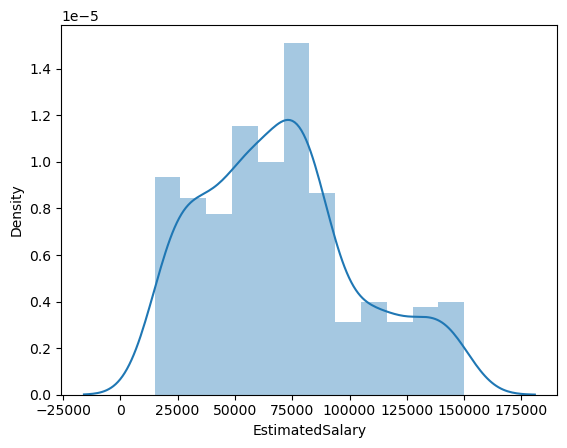

In [41]:
sns.distplot(newdf['EstimatedSalary'])

C:\Users\CCM\anaconda3\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

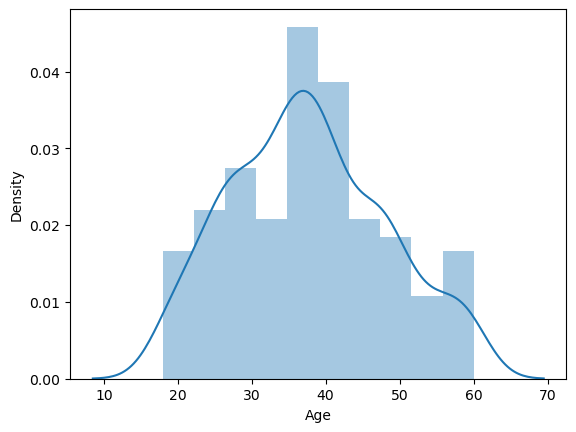

In [42]:
sns.distplot(newdf['Age'])

In [43]:
from sklearn.preprocessing import FunctionTransformer


In [44]:
trf = FunctionTransformer(func=np.log1p)

In [45]:
Estimated_salary_transformed = trf.fit_transform(newdf['EstimatedSalary'])

C:\Users\CCM\anaconda3\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

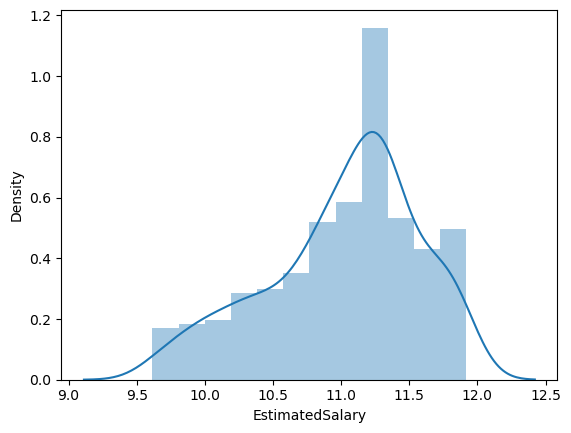

In [46]:
sns.distplot(Estimated_salary_transformed)

In [47]:
from sklearn.preprocessing import PowerTransformer

In [48]:
newdf.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


((array([-2.92336218, -2.63535913, -2.47295045, -2.35755533, -2.26698478,
         -2.19190181, -2.1274581 , -2.0708001 , -2.0201009 , -1.97411768,
         -1.93196517, -1.89298964, -1.85669409, -1.82269149, -1.79067433,
         -1.76039407, -1.73164687, -1.70426336, -1.67810123, -1.65303972,
         -1.62897542, -1.6058191 , -1.58349316, -1.56192972, -1.54106902,
         -1.52085818, -1.50125015, -1.48220291, -1.46367871, -1.44564358,
         -1.42806678, -1.41092042, -1.39417912, -1.37781969, -1.36182093,
         -1.34616333, -1.33082898, -1.31580134, -1.3010651 , -1.28660611,
         -1.2724112 , -1.25846816, -1.24476556, -1.23129278, -1.21803987,
         -1.20499751, -1.19215696, -1.17951003, -1.16704898, -1.15476657,
         -1.14265594, -1.13071061, -1.11892449, -1.10729178, -1.09580701,
         -1.08446499, -1.07326079, -1.06218972, -1.05124734, -1.0404294 ,
         -1.02973187, -1.01915091, -1.00868282, -0.99832412, -0.98807145,
         -0.97792161, -0.96787152, -0.

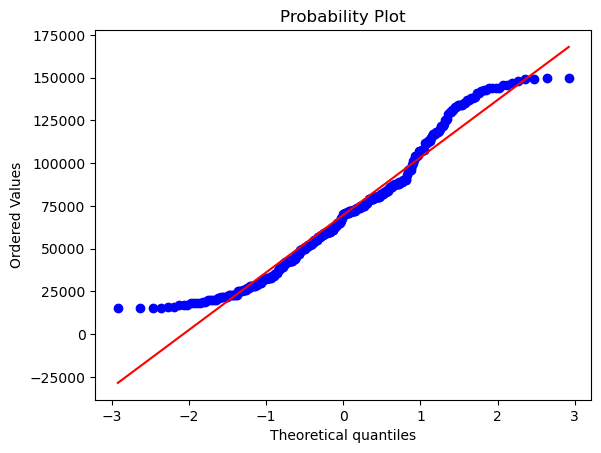

In [49]:
import scipy.stats as stats
stats.probplot(newdf['EstimatedSalary'],dist='norm',plot=plt)

In [50]:
pt = PowerTransformer(method='box-cox')

In [51]:
#tranformed=pt.fit_transform(newdf)

# DISCRETIZATION OR BINNING

https://machinelearningmastery.com/discretization-transforms-for-machine-learning/

Real-world data tend to be noisy. Noisy data is data with a large amount of additional meaningless information in it called noise. Data cleaning (or data cleansing) routines attempt to smooth out noise while identifying outliers in the data.

How to perform smoothing on the data?
There are three approaches to perform smoothing –

    Smoothing by bin means : In smoothing by bin means, each value in a bin is replaced by the mean value of the bin.
    Smoothing by bin median : In this method each bin value is replaced by its bin median value.
    Smoothing by bin boundary : In smoothing by bin boundaries, the minimum and maximum values in a given bin are identified 
                               as the bin boundaries. Each bin value is then replaced by the closest boundary value.     
      
   
Advantage :      
      
      1. Handles outlier well.
      2. Uniform Spread.
      
    Supervised Binning :
      a. Equal width binning.
      b. Equal freuency binning, uantile binning (percentile binning).
      c. k-Means binning(when data is in the form of clusters. Centroids are the bins.)
      
    Custom Binning.
    
    Unupervised Binning :
      a. Decision tree binning

# HANDLING MISSING VALUES :

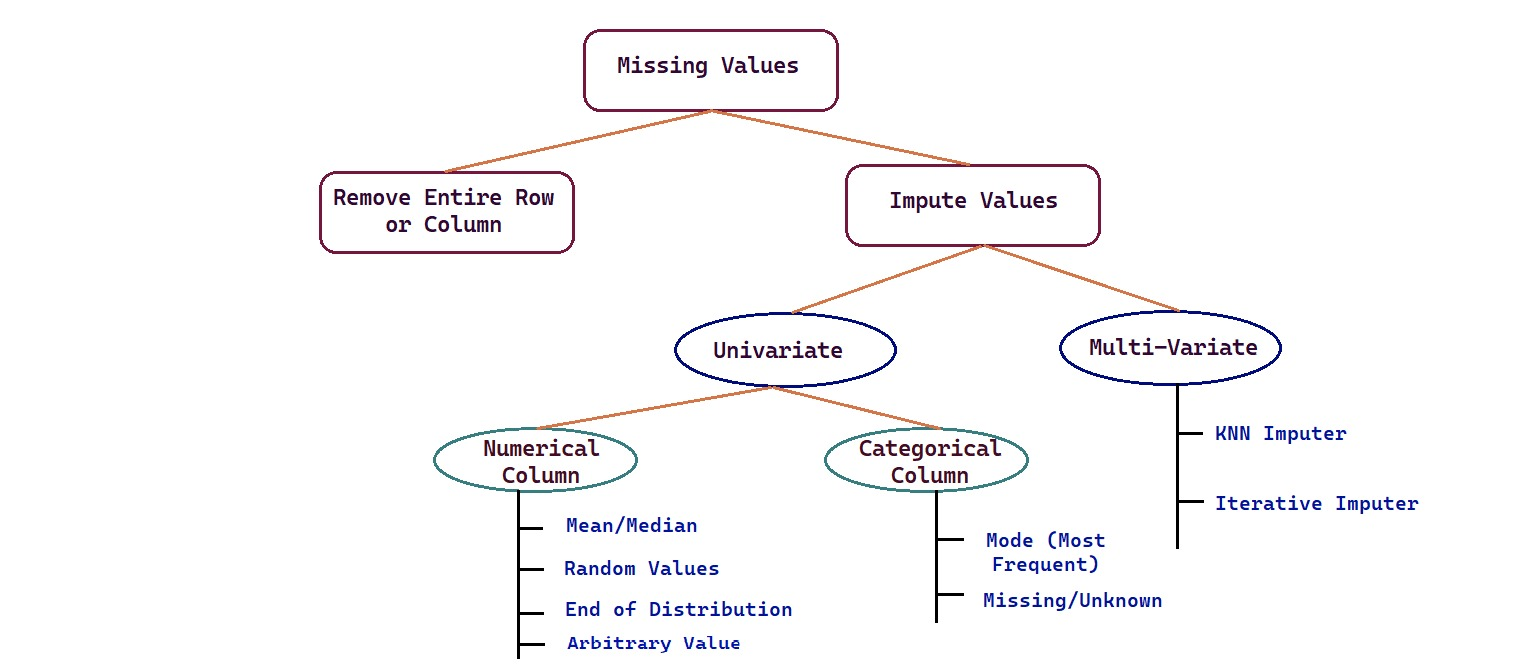



In [52]:
df3 = pd.read_csv('Heart.csv')

In [53]:
missing = df3.isnull().sum()

In [54]:
 total_value = np.product(df3.shape)

In [55]:
percent = (missing.sum()/total_value)*100

In [56]:
percent

0.9507665094339623

In [57]:
missing.sum()

645

In [58]:
missing

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [59]:
df3.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [60]:
#APPLY CCA IF MISING VALUES ARE LES THAN 5% OF TOTAL DATA AND DATA IS COMPLETELY MISSING AT RANDOM


cols = [i for i in df3.columns if df3[i].isnull().mean() < 0.05 and df3[i].isnull().sum() > 0 ]

In [61]:
cols

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

In [62]:
new= df3[cols]
df3[cols].head(5)

,education,cigsPerDay,BPMeds,totChol,BMI,heartRate
0,4.0,0.0,0.0,195.0,26.97,80.0
1,2.0,0.0,0.0,250.0,28.73,95.0
2,1.0,20.0,0.0,245.0,25.34,75.0
3,3.0,30.0,0.0,225.0,28.58,65.0
4,3.0,23.0,0.0,285.0,23.10,85.0


In [63]:
len(df3[cols].dropna()) / len(df3)

# Check how many % of data remains after dropping all the Nan values

0.9408018867924528

<AxesSubplot:>

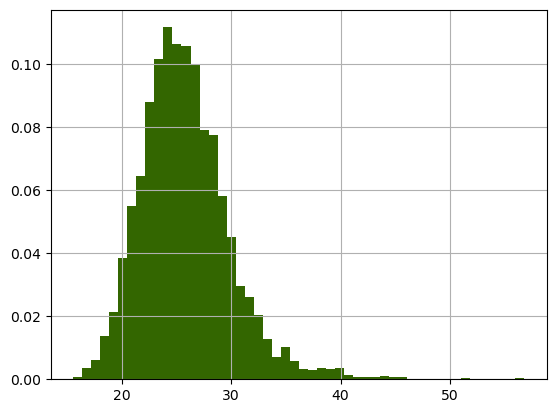

In [64]:
# CHECK FOR DISTRIBUTION AFTER APPLYING CCA

fig = plt.figure()
ax = fig.add_subplot(111)


df3['BMI'].hist(bins = 50, ax = ax, density = True , color = 'red')

#new data
new['BMI'].hist(bins = 50, ax = ax, density = True , color = 'green' , alpha = 0.8)

# 2.Filling Missing Values: Simple Imputer: Numerical Data

In [65]:
new.isnull().mean()

education     0.024764
cigsPerDay    0.006840
BPMeds        0.012500
totChol       0.011792
BMI           0.004481
heartRate     0.000236
dtype: float64

In [66]:
x = new[cols].drop(columns=['BMI'])
y = new[cols]['BMI']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [69]:
mean_education = x_train['education'].mean()
median_education = x_train['education'].median()

mean_cigsPerDay = x_train['cigsPerDay'].mean()
median_cigsPerDay = x_train['cigsPerDay'].median()

In [70]:
x_train['education_mean']= x_train['education'].fillna(mean_education)
x_train['education_median'] = x_train['education'].fillna(median_education)

x_train['cigsPerDay_mean'] = x_train['cigsPerDay'].fillna(mean_cigsPerDay)
x_train['cigsPerDay_median'] = x_train['cigsPerDay'].fillna(median_cigsPerDay)

C:\Users\CCM\AppData\Local\Temp\ipykernel_6792\2356707230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['education_mean']= x_train['education'].fillna(mean_education)
C:\Users\CCM\AppData\Local\Temp\ipykernel_6792\2356707230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['education_median'] = x_train['education'].fillna(median_education)
C:\Users\CCM\AppData\Local\Temp\ipykernel_6792\2356707230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [71]:
x_train.sample(5)


,education,cigsPerDay,BPMeds,totChol,heartRate,education_mean,education_median,cigsPerDay_mean,cigsPerDay_median
1006,4.0,0.0,0.0,220.0,61.0,4.0,4.0,0.0,0.0
2217,1.0,20.0,0.0,195.0,85.0,1.0,1.0,20.0,20.0
3374,4.0,30.0,0.0,210.0,75.0,4.0,4.0,30.0,30.0
4141,4.0,0.0,0.0,206.0,72.0,4.0,4.0,0.0,0.0
2199,4.0,0.0,0.0,260.0,60.0,4.0,4.0,0.0,0.0


In [72]:
# Checking for variance : shrink a bit since value shifts towards the mean 

print('original education variance: ',x_train['education'].var())
print('education variance after mean: ',x_train['education_mean'].var())
print('education variance after median: ',x_train['education_median'].var())

print('original CigsPerDay variance: ',x_train['cigsPerDay'].var())
print('CigsPerDay variance after mean: ',x_train['cigsPerDay'].var())
print('CigsPerDay variance after median: ',x_train['cigsPerDay'].var())

original education variance:  1.0413059096695905
education variance after mean:  1.0148970897841336
education variance after median:  1.0149007083122066
original CigsPerDay variance:  139.88760805698
CigsPerDay variance after mean:  139.88760805698
CigsPerDay variance after median:  139.88760805698


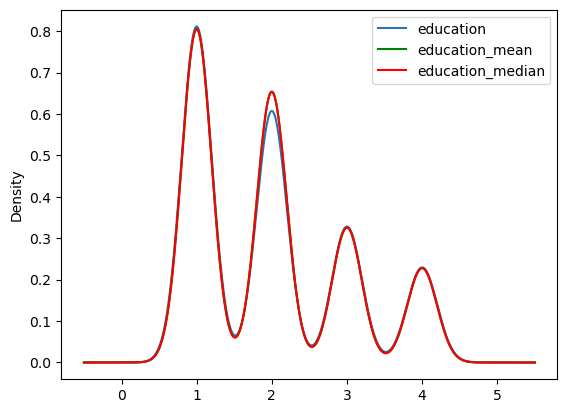

In [73]:
#CHECK FOR DISTRIBUTION FOR EACH COLUMN IT SHOULD NOT CHANGE MUCH

#FOR Education

fig = plt.figure()
ax = fig.add_subplot(111)

#original
x_train['education'].plot(kind = 'kde', ax=ax)

#mean
x_train['education_mean'].plot(kind = 'kde', ax=ax, color = 'green' )

#median
x_train['education_median'].plot(kind = 'kde', ax=ax, color = 'red' )


lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')


In [74]:
#CHECK FOR COVARIANCE AND CORRELATION

x_train.cov() 

,education,cigsPerDay,BPMeds,totChol,heartRate,education_mean,education_median,cigsPerDay_mean,cigsPerDay_median
education,1.041306,0.149084,0.000950,-1.282205,-0.819853,1.041306,1.041306,0.148080,0.144686
cigsPerDay,0.149084,139.887608,-0.082887,-16.643974,10.999415,0.145310,0.144951,139.887608,139.887608
BPMeds,0.000950,-0.082887,0.028977,0.564144,0.032353,0.000926,0.000927,-0.082318,-0.080501
totChol,-1.282205,-16.643974,0.564144,1928.469020,49.237339,-1.249711,-1.249353,-16.528433,-16.921240
heartRate,-0.819853,10.999415,0.032353,49.237339,146.287663,-0.799060,-0.799656,10.924810,10.708862
education_mean,1.041306,0.145310,0.000926,-1.249711,-0.799060,1.014897,1.014897,0.144325,0.141017
education_median,1.041306,0.144951,0.000927,-1.249353,-0.799656,1.014897,1.014901,0.143968,0.140647
cigsPerDay_mean,0.148080,139.887608,-0.082318,-16.528433,10.924810,0.144325,0.143968,138.938798,138.938798
cigsPerDay_median,0.144686,139.887608,-0.080501,-16.921240,10.708862,0.141017,0.140647,138.938798,139.467435


In [75]:
x_train.cov() 

,education,cigsPerDay,BPMeds,totChol,heartRate,education_mean,education_median,cigsPerDay_mean,cigsPerDay_median
education,1.041306,0.149084,0.000950,-1.282205,-0.819853,1.041306,1.041306,0.148080,0.144686
cigsPerDay,0.149084,139.887608,-0.082887,-16.643974,10.999415,0.145310,0.144951,139.887608,139.887608
BPMeds,0.000950,-0.082887,0.028977,0.564144,0.032353,0.000926,0.000927,-0.082318,-0.080501
totChol,-1.282205,-16.643974,0.564144,1928.469020,49.237339,-1.249711,-1.249353,-16.528433,-16.921240
heartRate,-0.819853,10.999415,0.032353,49.237339,146.287663,-0.799060,-0.799656,10.924810,10.708862
education_mean,1.041306,0.145310,0.000926,-1.249711,-0.799060,1.014897,1.014897,0.144325,0.141017
education_median,1.041306,0.144951,0.000927,-1.249353,-0.799656,1.014897,1.014901,0.143968,0.140647
cigsPerDay_mean,0.148080,139.887608,-0.082318,-16.528433,10.924810,0.144325,0.143968,138.938798,138.938798
cigsPerDay_median,0.144686,139.887608,-0.080501,-16.921240,10.708862,0.141017,0.140647,138.938798,139.467435


<AxesSubplot:>

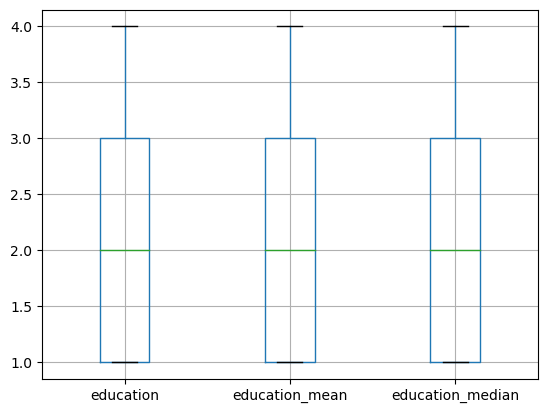

In [76]:
#Check for outlier using Box Plot


x_train[['education','education_mean','education_median']].boxplot()

<AxesSubplot:>

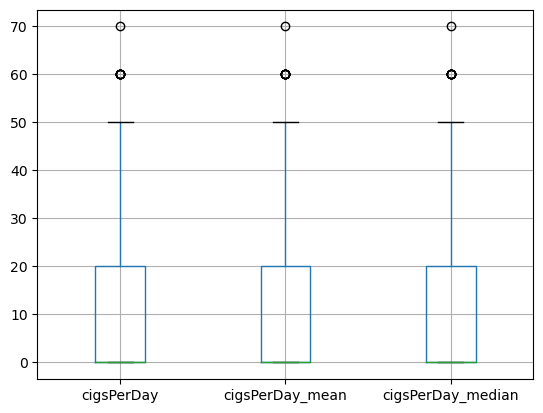

In [77]:
x_train[['cigsPerDay','cigsPerDay_mean','cigsPerDay_median']].boxplot()

In [78]:
#USING SK-LEARN

from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy = 'mean')
imputer2 = SimpleImputer(strategy = 'median')

trf = ColumnTransformer([('imputer1',imputer1,['education']),('imputer2',imputer2,['cigsPerDay'])],remainder='passthrough')


In [79]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['education']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['cigsPerDay'])])

In [80]:
x_train.shape

(3392, 9)

In [81]:
# trf.transform(x_train)

# 3. RANDOM VALUE IMPUTATION

In this type of imputation, we randomly select the values from the missing data and fill it in the missing values

Benifits:

    Simple to use.
    The distribution of the data remains the same
    preserves the variance of the variable.

Disadvantages:

    It disturbes the covariance of the data.
    Heavy on memory.
    Does not works the best with Decision Tree based algorithms because of inducing randomness in the data.
    
Used during linear models.


# 4. Filling Missing Values: Simple Imputer: Categorical Data

There are basically 2 ways of filling missing values:

    1.filling the most frequent value.
    2.creating a separate column as mIssing.

So if the data is Missing Completely At Random(MCAR) and the missing data is less than 5% then we can either use i) Mean/Median method or ii) Mode method


when the missing data is less than 5% we use Mode to fill the missing values and the missing data is more than 10% we need to make a separate column for missing data.

# 5. KNN IMPUTER 

MULTIVARIATE TECHNIUE

Steps of working:

    Find the K Nearest Neighbour - We take the sum of all the neighbours and divide it by the number of neighbours.
    Find the Value - take value from every neighbour and calculate the mean from it.

Advantages:

    This is a more accurate method.
    Its very good to work with for small and medium sized datasets.
    
Disadvanatages:

    More number of calculations
    When deploying, need to upload the whole X train set, so consumes a lot of memory.

# 6.Filling Missing Values: Multivariate Imputation : Iterative Imputer



Iterative Imputer also known as MICE(Multivariate Imputation by Chained Equations)

Assumptions: So we have 3 types of Missing Data:

    MCAR : Missing Completely At Random
    MAR : Missing At Random
    MNAR : Missing Not At Random
    
It is an assumption that technique works the best with MAR : Missing At Random.

Advantages:

    Accurate

Disadvantages:

    Slow
    Deploy the entire training set on server.

Remove the output Column

1. Replace all the NaN values with the mean.
2. Remove 1 of the mean value with Nan Value.
3. Amonng the xtrain predict the NAN value using ML Algo.

Then form the dataset again with ML ALGO - MEAN.
We do it unless the difference becomes 0 or close to 0.(or fixed number of iteration)

# FEATURE SELECTION 

Filter methods: These methods rank the features based on some statistical measure and select the top-ranked features. Examples include Pearson's correlation, Chi-square test, and ANOVA.


(When the number of features are less)Wrapper methods: These methods use a specific machine learning algorithm to evaluate the subset of features, which leads to a more accurate model. Examples include forward selection, backward elimination, and recursive feature elimination.


(When number of features are very high)Embedded methods: These methods combine feature selection with model building, and the selected features are based on the importance they have in the model. Examples include Lasso and Ridge regression.


Principal Component Analysis (PCA): This technique involves transforming the original features into a new set of features that are uncorrelated with each other, and then selecting the top-ranked principal components.


Genetic algorithms: These methods involve a search algorithm that explores the space of possible feature subsets, evaluating the fitness of each subset based on some criteria.


Information gain methods: These methods calculate the information gain of each feature with respect to the target variable, and select the features with the highest information gain.


Correlation-based feature selection (CFS): This method evaluates the correlation between the features and the target variable, and selects the features that are highly correlated with the target variable but not highly correlated with each other.


Mutual information-based feature selection: This method evaluates the mutual information between the features and the target variable, and selects the features that have the highest mutual information with the target variable.
